In [124]:
# import required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

# 1. Load the data 

In [125]:
# Read the “housing.csv” file from the folder into the program
housing = pd.read_excel('housing.xlsx')

In [126]:
# Print first few rows of this data.
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [127]:
# Extract input (X) and output (Y) data from the dataset.
# X= housing.drop(['median_house_value'],axis = 1)
# y = housing['median_house_value']

In [128]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

## 2. Handle missing values 
### Fill the missing values with the mean of the respective column.

In [129]:
#Checking Nan values 
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [130]:
# nan value found in total_bedrooms
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [131]:
# mean of total bedroom
hm = housing['total_bedrooms'].mean()
hm

537.8705525375618

In [132]:
# Fill the missing values with the mean of the respective column.
housing['total_bedrooms'] = housing['total_bedrooms'].fillna(hm)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [133]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [134]:
housing.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [135]:
#stats of the given data
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [136]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000


<AxesSubplot:>

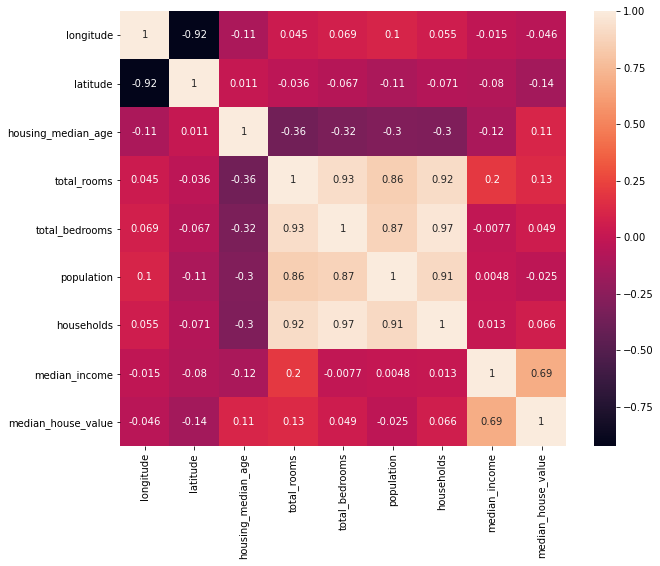

In [137]:
plt.figure(figsize=(10,8))
sns.heatmap(housing.corr(),annot=True,fmt='.2g')

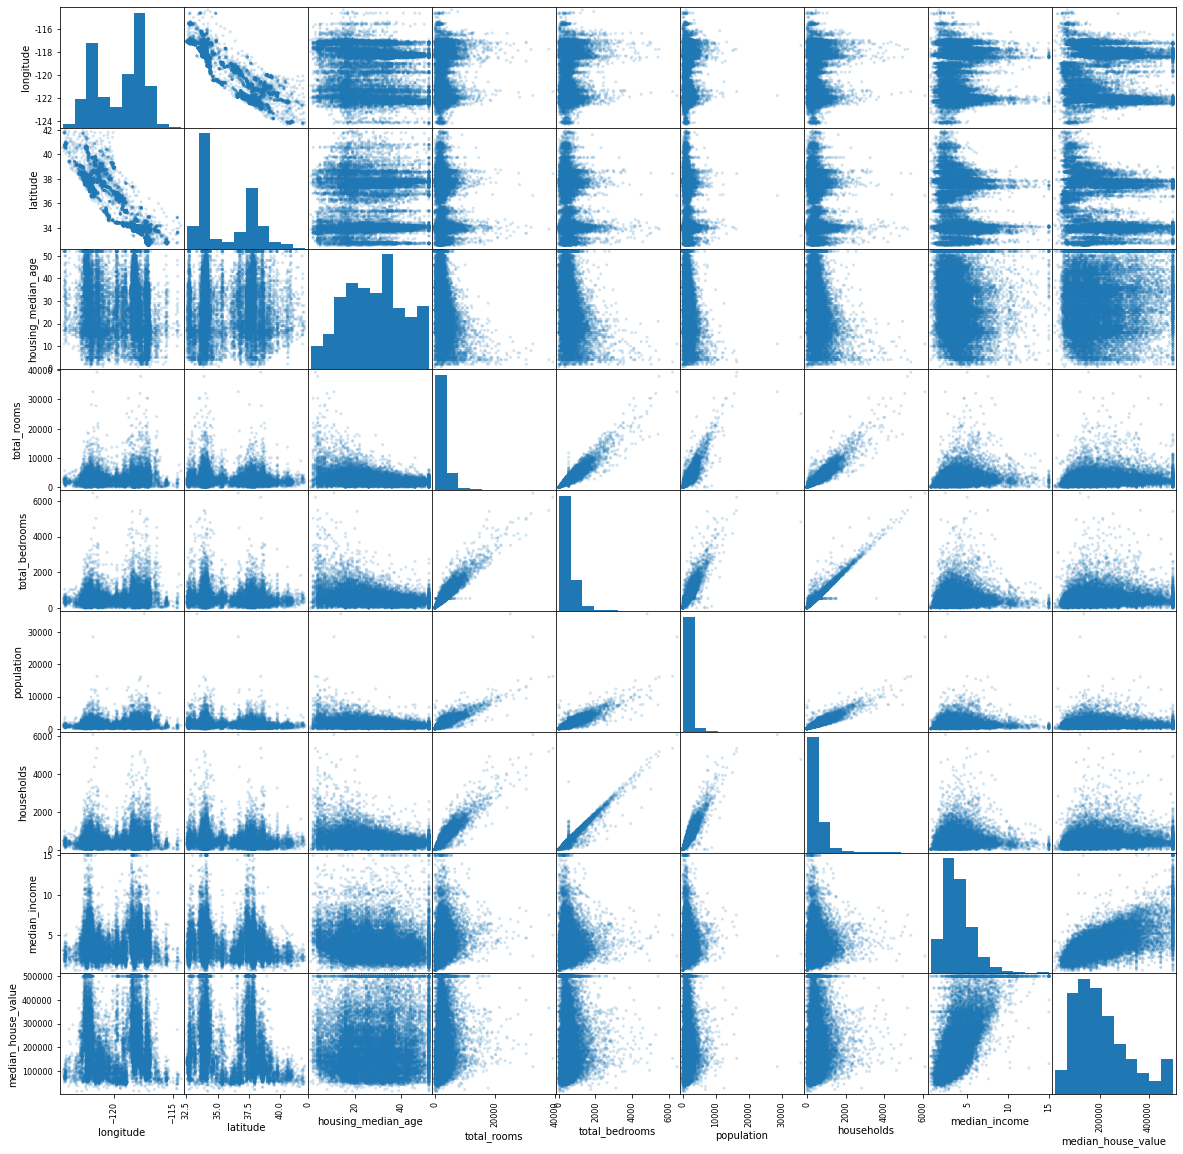

In [138]:

pd.plotting.scatter_matrix(housing,alpha = 0.2, figsize=(20,20),diagonal='hist');

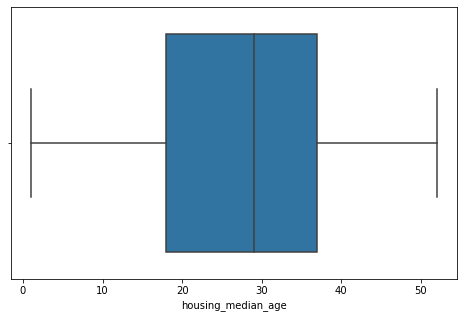

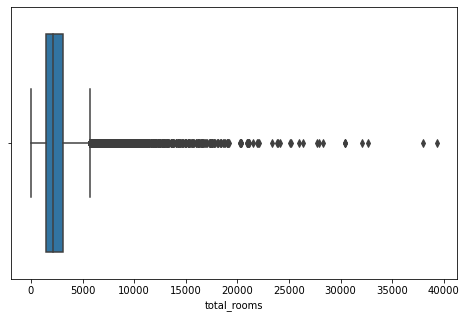

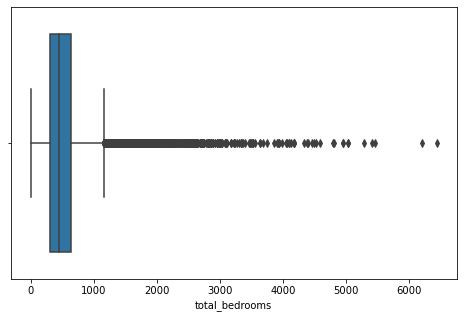

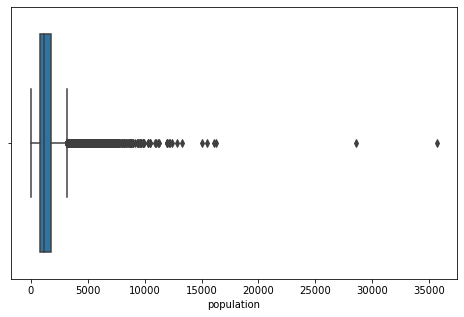

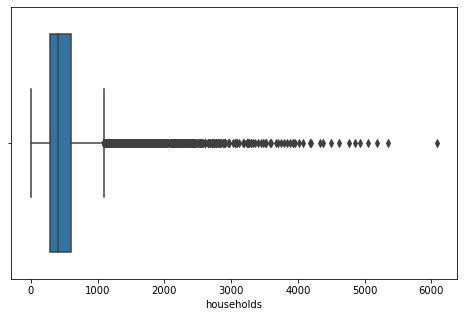

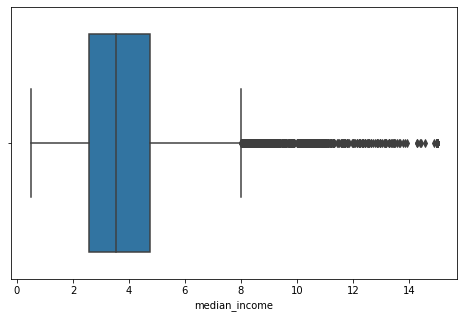

In [139]:
# Checking the outliers and treat the otliers
 # upper cap outlier - big values == q3+(1.5*IQR) < bigger outlier
# lower cap outliers - lower values == q1-(1.5*IQR) > lower outlier  
# IQR - Inter Quartile Range - Q3-Q1   (75%-25%)
def bplot(col_name,data):
    for column in col_name:
        plt.figure(figsize=(8,5))
        sns.boxplot(x = data[column])
        plt.show()
        
        q1 = data[column].quantile(0.25)
        q2 = data[column].quantile(0.5)
        q3 = data[column].quantile(0.75)
        
        iqr = q3-q1
        min_val = q1 - (1.5 * iqr)
        max_val = q3 + (1.5 * iqr)
        data[column] = np.where(data[column] < min_val, q2, data[column])
        data[column] = np.where(data[column] > max_val, q2, data[column])
    return data
housing = bplot(housing.drop(['longitude', 'latitude','ocean_proximity', 'median_house_value'], axis = 1).columns,housing)  


In [140]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

## 3. Encode categorical data :

In [141]:
print(housing['ocean_proximity'].value_counts())

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


In [146]:
#Convert categorical column in the dataset to numerical data.

le = LabelEncoder()

housing['ocean_proximity'] = le.fit_transform(housing['ocean_proximity'])

print(housing['ocean_proximity'].value_counts())
# housing.head()


0    9136
1    6551
4    2658
3    2290
2       5
Name: ocean_proximity, dtype: int64


## 4. Split the dataset :  

In [147]:
# Extract input (X) and output (Y) data from the dataset.
X= housing.drop(['median_house_value'],axis = 1)
print(X.head())
y = housing['median_house_value']
y.head()

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       2127.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  ocean_proximity  
0       322.0       126.0         3.5348                3  
1      2401.0       409.0         3.5348                3  
2       496.0       177.0         7.2574                3  
3       558.0       219.0         5.6431                3  
4       565.0       259.0         3.8462                3  


0    452600
1    358500
2    352100
3    341300
4    342200
Name: median_house_value, dtype: int64

In [150]:
# Split the data into 80% training dataset and 20% test dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 885767)
print("X_train shape {} and size {} ".format(X_train.shape,X_train.size))
print("X_test shape {} and size {} ".format(X_test.shape,X_test.size))
print("y_train shape {} and size {} ".format(y_train.shape,y_train.size))
print("y_test shape {} and size {} ".format(y_test.shape,y_test.size))

X_train shape (16512, 9) and size 148608 
X_test shape (4128, 9) and size 37152 
y_train shape (16512,) and size 16512 
y_test shape (4128,) and size 4128 


In [151]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12664,-121.45,38.49,34.0,3573.0,662.0,1540.0,620.0,3.5323,1
19587,-120.80,37.61,30.0,918.0,154.0,469.0,139.0,3.9688,1
17695,-121.83,37.29,10.0,1828.0,453.0,1356.0,409.0,4.5943,0
14888,-117.08,32.62,36.0,1674.0,309.0,818.0,307.0,3.4773,4
15513,-117.03,33.18,17.0,5391.0,886.0,2732.0,830.0,5.1771,0


In [152]:
y_train.head()

12664    109800
19587    175000
17695    123500
14888    150400
15513    212800
Name: median_house_value, dtype: int64

# 5. Standardize data :

In [162]:
# Standardize training and test datasets.

In [153]:
sc = StandardScaler()

In [154]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [156]:
X_train[:2]

array([[-0.93656206,  1.33783847,  0.42440734,  1.20187946,  0.89687743,
         0.50174268,  0.88723042, -0.07830913, -0.12030037],
       [-0.61262987,  0.92596535,  0.10669711, -1.16458391, -1.33645806,
        -1.21199913, -1.35272962,  0.22042878, -0.12030037]])

In [86]:
X_test[:2]


array([[-1.0362335 ,  1.82459761, -0.44929579, -0.74655328, -0.58468568,
        -0.93837649, -0.65419738, -1.48063211, -0.12030037],
       [ 0.66316459, -0.81981503,  0.66269001, -0.34010985, -0.40443616,
        -0.03110141, -0.36547072, -0.79705954, -0.82270478]])

# 6. Perform Linear Regression : 



In [157]:
#Perform Linear Regression on training data.
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [158]:
lm.fit(X_train,y_train)

LinearRegression()

In [159]:
lm.intercept_

206680.726380814

In [160]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [161]:
lm.coef_

array([-104923.11119945, -111917.26909782,   12508.35971005,
         18133.24085733,   15632.78499284,  -27368.33042907,
         -1717.68427823,   51915.89387004,    -714.53213751])

In [162]:
coef_df = pd.DataFrame(lm.coef_, index=X.columns)
coef_df.sort_values(0, ascending = False)

,0
median_income,51915.893870
total_rooms,18133.240857
total_bedrooms,15632.784993
housing_median_age,12508.359710
ocean_proximity,-714.532138
households,-1717.684278
population,-27368.330429
longitude,-104923.111199
latitude,-111917.269098


In [163]:
#Predict output for test dataset using the fitted model.
y_pred = lm.predict(X_test)
y_pred[:5]

array([ 32927.05919773, 185337.04782558, 295822.97270441, 230923.12115492,
       162953.11127601])

In [164]:
y_test[:5]

1174      65200
7603     111000
846      236500
11365    201200
16559    119400
Name: median_house_value, dtype: int64

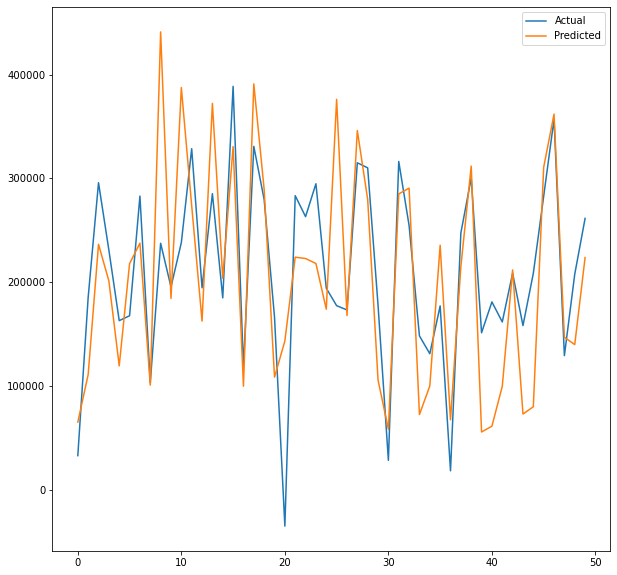

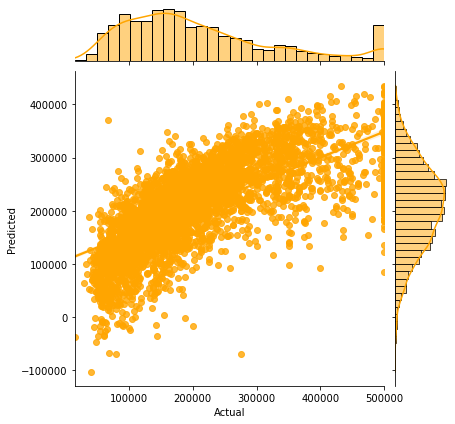

In [187]:
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
test.head()
plt.figure(figsize=(10,10))
test = test.reset_index()
test = test.drop(['index'],axis = 1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x = 'Actual', y = 'Predicted', data = test, kind = 'reg',color ='orange');

In [188]:
# Print root mean squared error (RMSE) from Linear Regression.
#             [ HINT: Import mean_squared_error from sklearn.metrics ]
from sklearn.metrics import mean_squared_error

print('RMSE value: ', np.sqrt(mean_squared_error(y_test,y_pred)).round(2))

RMSE value:  83625.21


# 7. Bonus exercise: Perform Linear Regression with one independent variable 

In [229]:
# Extract just the median_income column from the independent variables (from X_train and X_test).
dropcol = ["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","ocean_proximity","median_house_value"]
print(dropcol)
housing_med = housing.drop(dropcol,axis=1)
housing_med.head()

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'ocean_proximity', 'median_house_value']


,median_income
0,3.5348
1,3.5348
2,7.2574
3,5.6431
4,3.8462


In [231]:
X1 = housing_med


In [232]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y,test_size = 0.2, random_state=88)
print("X_train1 shape {} and size {}".format(X_train1.shape,X_train1.size))
print("X_test1 shape {} and size {}".format(X_test1.shape,X_test1.size))
print("y_train1 shape {} and size {}".format(y_train1.shape,y_train1.size))
print("y_test1 shape {} and size {}".format(y_test1.shape,y_test1.size))

X_train1 shape (16512, 1) and size 16512
X_test1 shape (4128, 1) and size 4128
y_train1 shape (16512,) and size 16512
y_test1 shape (4128,) and size 4128


In [234]:
# Perform Linear Regression to predict housing values based on median_income.
lm.fit(X_train1,y_train1)

LinearRegression()

In [235]:
# Predict output for test dataset using the fitted model.
y_pred1 = lm.predict(X_test1)
print('Predicted: /n',y_pred1[:5])
print('Actual: /n',y_test1[:5])
df = pd.DataFrame({'Predicted': y_pred1, 'Actual': y_test1})
df.head()

Predicted: /n [311674.81063833 131246.66530483 172605.92950083  89988.27736297
 152334.18834347]
Actual: /n 8310     463500
1801      94000
4781     176800
6949     166300
19945     60000
Name: median_house_value, dtype: int64


,Predicted,Actual
8310,311674.810638,463500
1801,131246.665305,94000
4781,172605.929501,176800
6949,89988.277363,166300
19945,152334.188343,60000


Text(0, 0.5, ' Predicted median_house_value')

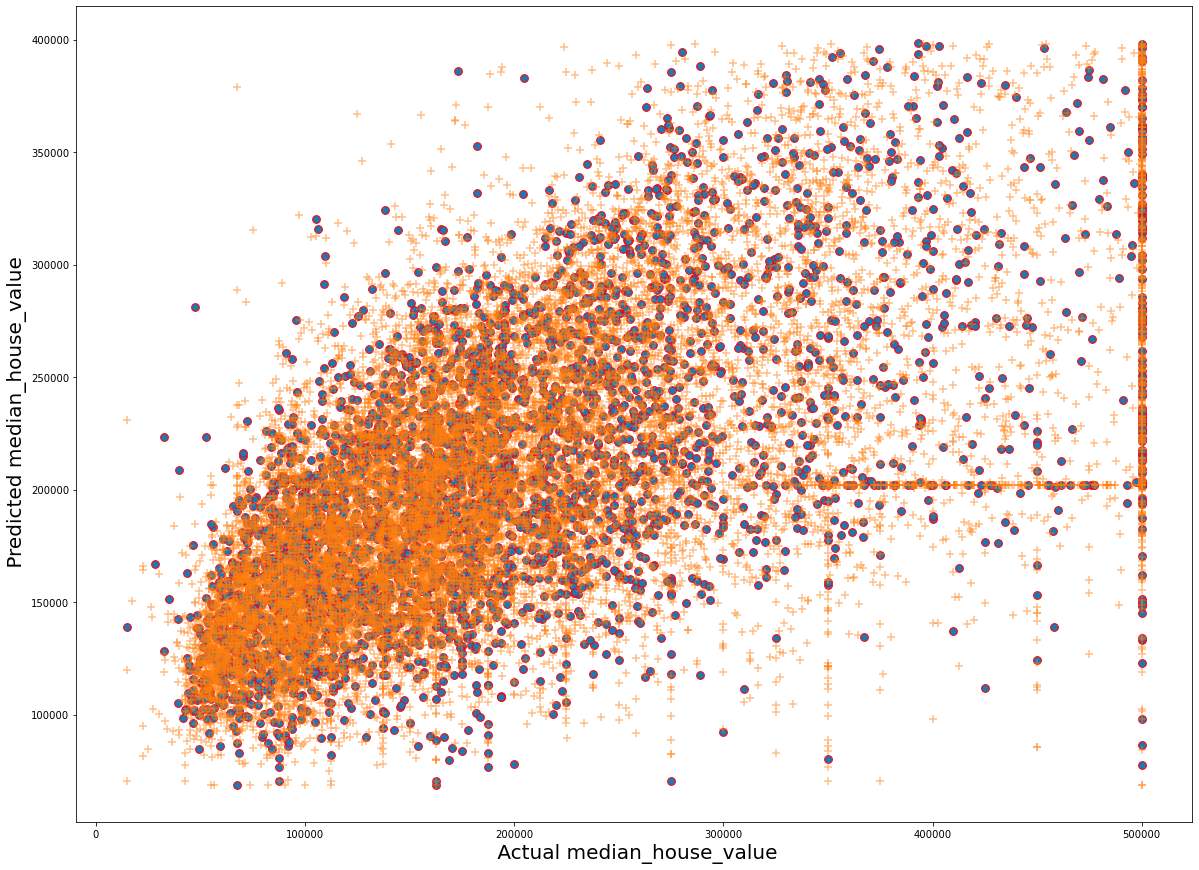

In [236]:
# Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.
plt.figure(figsize=(20,15))
plt.scatter(y_test1,y_pred1,marker='o',edgecolors='r',s=60,);
plt.scatter(y_train1,lm.predict(X_train1),marker="+",s=50,alpha=0.5,edgecolors='g');
plt.xlabel(" Actual median_house_value", size=20)
plt.ylabel(" Predicted median_house_value",size = 20)